# Ablation Studies

User settings:

In [86]:
result_set = [
    'peucrl_minus_r_11',
    'peucrl_minus_r_minus_action_pruning_5',
    'peucrl_minus_r_minus_shield_9',
    'peucrl_minus_r_minus_safety_6',
]
pretty_result_set = [
    'PeUcrl',
    'PeUcrl\\ActionPruning',
    'PeUcrl\\Shield',
    'PeUcrl\\ActionPruning\\Shield',
]
rolling_window_width = 1000
max_time = 100000

Initialisations:

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Sample complexity analysis

Hypotheses:
- PeUcrl\ActionPruning\Shield (for "\\", read "without") will perform best in terms of rewards but worst in terms of safety. In particular, it might have 100% side effects incidence.
- PeUcrl\ActionPruning will have acceptable safety but it will not decrease over time. It may have a sidee effects incidence that rises to 50% side effects incidence. That is the case since the constraint is "P>=0.8 [ G n <= 1 ]".
- PeUcrl\Shield will only eventually be safe. High rewards in the beginning may decrease over learning as action pruning is performed.
- PeUcrl will have acceptable safety and it may decrease over time. High rewards in the beginning may decrease over learning as action pruning is performed.

Also note that all algorithms may get an initial burst of reward that then decreases and eventually goes back up. This is because of experimentation is happening.

/tmp/ipykernel_6244/1348852246.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


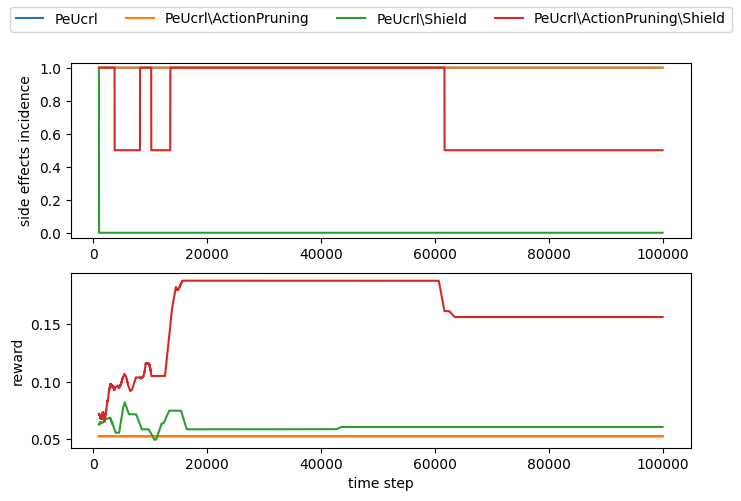

In [88]:
fig, (side_effects_plot, reward_plot) = plt.subplots(2, 1, figsize=(8, 5))

for result in result_set:

    side_effects_incidence = pd.read_csv(
        'results/.' + result + '/data.csv',
        index_col='time_step',
        usecols=['time_step', 'side_effects_incidence'],
    )
    side_effects_plot.plot(side_effects_incidence[:max_time].rolling(rolling_window_width).max())

    reward = pd.read_csv(
        'results/.' + result + '/data.csv',
        index_col='time_step',
        usecols=['time_step', 'reward'],
    )
    reward_plot.plot(reward[:max_time].rolling(rolling_window_width).mean())

fig.legend(pretty_result_set, loc='upper center', ncols=4)
side_effects_plot.set_ylim(-0.03, 1.03)
side_effects_plot.set_ylabel('side effects incidence')
reward_plot.set_ylabel('reward')
reward_plot.set_xlabel('time step')
#fig.suptitle('Sample-Based')


fig.show()

Safety works as expected.
Reward maximisation works well for PeUcrl\ActionPruning\Shield, but very poorly for the algorithms with Shield.
PeUcrl\Shield may as it happens get lower reward but also getting lower side effects incidence, so maybe that is simply the cost to pay.

Below, I zoom in on the first 30 time steps.

In [89]:
# zoomed in
rolling_window_width = 1
max_time = 30

/tmp/ipykernel_6244/1348852246.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


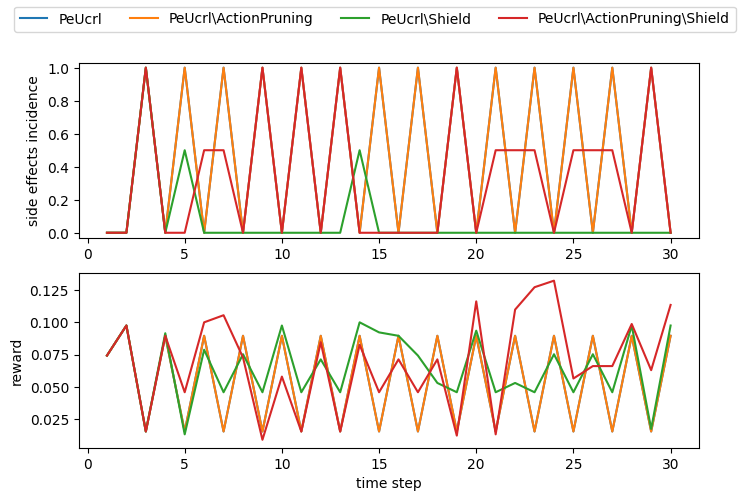

In [90]:
fig, (side_effects_plot, reward_plot) = plt.subplots(2, 1, figsize=(8, 5))

for result in result_set:

    side_effects_incidence = pd.read_csv(
        'results/.' + result + '/data.csv',
        index_col='time_step',
        usecols=['time_step', 'side_effects_incidence'],
    )
    side_effects_plot.plot(side_effects_incidence[:max_time].rolling(rolling_window_width).max())

    reward = pd.read_csv(
        'results/.' + result + '/data.csv',
        index_col='time_step',
        usecols=['time_step', 'reward'],
    )
    reward_plot.plot(reward[:max_time].rolling(rolling_window_width).mean())

fig.legend(pretty_result_set, loc='upper center', ncols=4)
side_effects_plot.set_ylim(-0.03, 1.03)
side_effects_plot.set_ylabel('side effects incidence')
reward_plot.set_ylabel('reward')
reward_plot.set_xlabel('time step')
#fig.suptitle('Sample-Based')


fig.show()

It is very peculiar that PeUcrl and PeUcrl\ActionPruning both behave as PeUcrl\ActionPruning should behave. The unshielded agents seem to satisfy expectations, so probably there is something odd with the implementation of the shield, but I have already gone over it several times.

Next: Try with different seeds for the agents. (In case, the agents were only initialised with unfortunate choices fof the seed.)

In [82]:
result_array = np.array([
    ['peucrl_minus_r_9', 'peucrl_minus_r_10', 'peucrl_minus_r_11'],
    ['peucrl_minus_r_minus_action_pruning_3', 'peucrl_minus_r_minus_action_pruning_4', 'peucrl_minus_r_minus_action_pruning_5'],
    ['peucrl_minus_r_minus_shield_7', 'peucrl_minus_r_minus_shield_8', 'peucrl_minus_r_minus_shield_9'],
    ['peucrl_minus_r_minus_safety_4', 'peucrl_minus_r_minus_safety_5', 'peucrl_minus_r_minus_safety_6'],
])
pretty_result_set = np.array([
    'PeUcrl',
    'PeUcrl\\ActionPruning',
    'PeUcrl\\Shield',
    'PeUcrl\\ActionPruning\\Shield',
])
rolling_window_width = 1000
max_time = 100000

In [83]:
import seaborn as sns

<AxesSubplot: xlabel='time_step'>

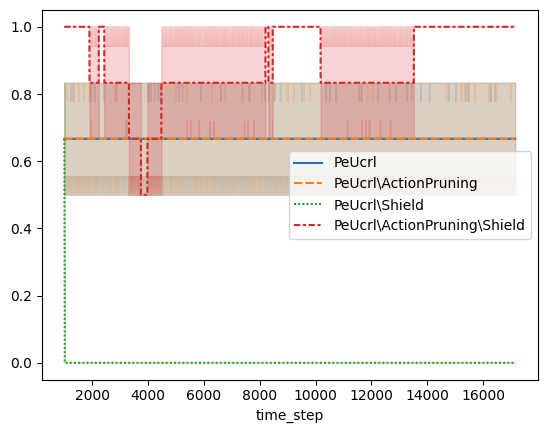

In [84]:
n_seeds = result_array.shape[1]
outer_first = True
for i in range(n_seeds):
    first = True
    for (j, result) in enumerate(result_array[:, i]):
        side_effects_incidence = pd.read_csv(
            'results/.' + result + '/data.csv',
            index_col='time_step',
            usecols=['time_step', 'side_effects_incidence'],
        )
        if first:
            first = False
            tmp = side_effects_incidence[:max_time].rename(columns={'side_effects_incidence': pretty_result_set[j]}).rolling(rolling_window_width).max()
        else:
            tmp = pd.concat([tmp, side_effects_incidence[:max_time].rename(columns={'side_effects_incidence': pretty_result_set[j]}).rolling(rolling_window_width).max()], axis=1, join='inner')
    if outer_first:
        outer_first = False
        stats = tmp
    else:
        stats = pd.concat([stats, tmp], axis=1, join='inner')

sns.lineplot(data=stats)

<AxesSubplot: xlabel='time_step'>

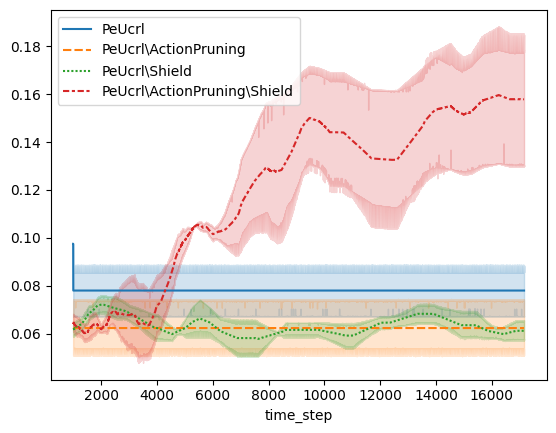

In [85]:
n_seeds = result_array.shape[1]
outer_first = True
for i in range(n_seeds):
    first = True
    for (j, result) in enumerate(result_array[:, i]):
        reward = pd.read_csv(
            'results/.' + result + '/data.csv',
            index_col='time_step',
            usecols=['time_step', 'reward'],
        )
        if first:
            first = False
            tmp = reward[:max_time].rename(columns={'reward': pretty_result_set[j]}).rolling(rolling_window_width).max()
        else:
            tmp = pd.concat([tmp, reward[:max_time].rename(columns={'reward': pretty_result_set[j]}).rolling(rolling_window_width).mean()], axis=1, join='inner')
    if outer_first:
        outer_first = False
        stats = tmp
    else:
        stats = pd.concat([stats, tmp], axis=1, join='inner')

sns.lineplot(data=stats)

No, it does not seem to be unfortunate choices of the seeds. The shielded agents still behave contrary to expectations. What we should expect:
- PeUcrl should keep exploring for at least one of the cells, but what does happen is that it gets stuck.
- PeUcrl should stop visiting unsafe states it has already visited (if possible), but it does not (PeUcrl\Shield shows that it is possible).
- PeUcrl should absolutely not get 100 % side effects incidence at any point!

Next step: Once again reveisit the shielding in depth.

## Time complexity analysis

To be continued ...